# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test
- Correlation test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

⭐Run the following code to read in the "cardio.csv" file.

In [2]:
df = pd.read_csv("cardio.csv", sep=";")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.set_index(['id'], inplace=True)

In [6]:
df.shape

(70000, 12)

In [7]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df["age"] = np.round(df.age/365,2)
df.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.39,2,168,62.0,110,80,1,1,0,0,1,0
1,55.42,1,156,85.0,140,90,3,1,0,0,1,1
2,51.66,1,165,64.0,130,70,3,1,0,0,0,1


In [9]:
for col in df.columns:
  sns.displot(x=col, height = 4, aspect = 2, data=df)

⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

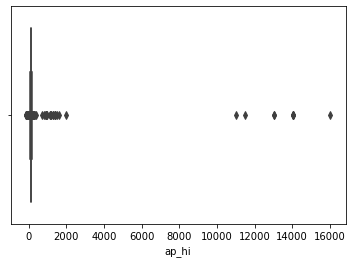

In [10]:
%matplotlib inline
sns.boxplot(x="ap_hi", data=df);

In [11]:
df = df[df["ap_hi"] < 250]
df = df[df["ap_hi"] > 0]

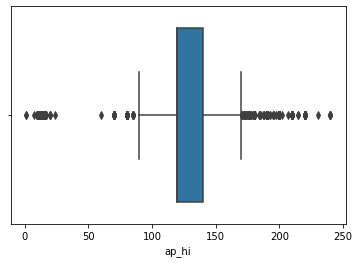

In [12]:
sns.boxplot(x="ap_hi", data=df);

In [13]:
iqr = stats.iqr(df.ap_hi)

In [14]:
np.percentile(df.ap_hi, 75) + 1.5*iqr

170.0

In [15]:
np.percentile(df.ap_hi, 25) - 1.5*iqr

90.0

In [16]:
df = df[df["ap_hi"] < 170]
df = df[df["ap_hi"] > 90]

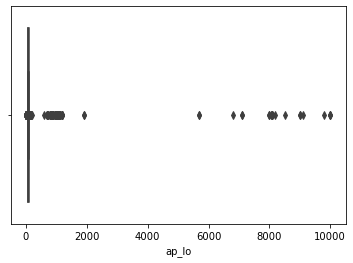

In [17]:
sns.boxplot(x="ap_lo", data=df);

In [18]:
df = df[df["ap_lo"] < 110]
df = df[df["ap_lo"] > 60]

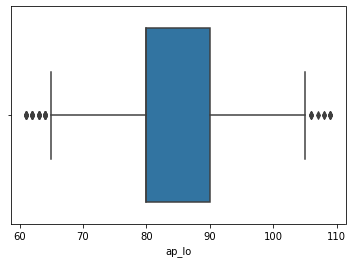

In [19]:
sns.boxplot(x="ap_lo", data=df);

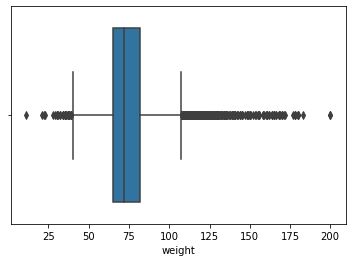

In [20]:
sns.boxplot(x="weight", data=df);

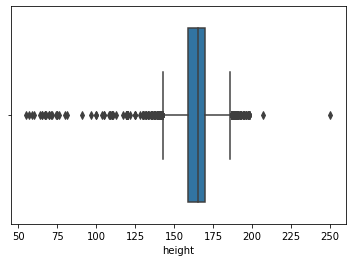

In [21]:
sns.boxplot(x="height", data=df);

In [22]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000
mean,53.392051,1.351928,164.466256,74.211244,126.346242,81.714838,1.362315,1.225115,0.087665,0.052934,0.803600,0.495927
std,6.734216,0.477576,8.144080,14.082985,13.779643,7.639202,0.679101,0.572492,0.282809,0.223904,0.397278,0.499987
min,29.750000,1.000000,55.000000,11.000000,93.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.530000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.010000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.460000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.970000,2.000000,250.000000,200.000000,169.000000,109.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df = df.sample(n = 500)

In [24]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,53.472780,1.334000,164.348000,74.254000,127.004000,82.024000,1.386000,1.248000,0.076000,0.064000,0.832000,0.506000
std,6.839021,0.472112,7.381319,13.370678,14.351164,7.878805,0.699989,0.599345,0.265264,0.244998,0.374241,0.500465
min,39.120000,1.000000,143.000000,44.000000,100.000000,69.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,49.470000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.105000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.477500,2.000000,169.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.480000,2.000000,185.000000,132.000000,166.000000,104.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

⭐What is the mean for Systolic blood pressure?

In [25]:
df.ap_hi.mean()

127.004

⭐What is the standard deviation for Systolic blood pressure?

In [26]:
df.ap_hi.std()

14.351163569257494

⭐What is the standard error of the mean for Systolic blood pressure?

In [27]:
df.ap_hi.sem()

0.6418035459415653

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

In [28]:
df.ap_hi.describe()

count    500.000000
mean     127.004000
std       14.351164
min      100.000000
25%      120.000000
50%      120.000000
75%      140.000000
max      166.000000
Name: ap_hi, dtype: float64

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [29]:
stats.t.interval(0.99, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(125.34447722217524, 128.66352277782477)

In [30]:
stats.t.interval(0.95, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(125.7430297100485, 128.2649702899515)

In [31]:
stats.t.interval(0.90, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(125.94636360342734, 128.06163639657268)

## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

In [32]:
#H0: mu = 122
#H1: mu =! 122

Conduct the significance test. Use scipy.stats.ttest_1samp

In [33]:
stats.ttest_1samp(df.ap_hi, 122)

Ttest_1sampResult(statistic=7.796778362542127, pvalue=3.7306587414751443e-14)

## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [34]:
df.groupby("gender").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,333.0,125.918919,14.300224,100.0,120.0,120.0,135.0,160.0
2,167.0,129.167665,14.249351,100.0,120.0,120.0,140.0,166.0


___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [35]:
stat, p = stats.levene(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=0.260, p=0.611
The population variances of group 1 and 2 are equal (fail to reject H0)


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [36]:
stats.ttest_ind(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"], equal_var = True)

Ttest_indResult(statistic=-2.3987385703784256, pvalue=0.016818417054868397)

Fail to reject the null. There is no statistically significant difference between two groups.

## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

<AxesSubplot:xlabel='gluc', ylabel='ap_hi'>

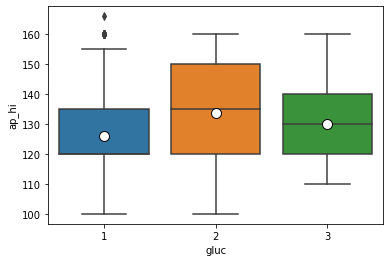

In [37]:
sns.boxplot(x="gluc", y="ap_hi", data=df, showmeans=True,  meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

⭐Show the descriptive statistics of 3 groups.

In [38]:
df.groupby("gluc").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,419.0,126.069212,14.260142,100.0,120.0,120.0,135.0,166.0
2,38.0,133.789474,16.369315,100.0,120.0,135.0,150.0,160.0
3,43.0,130.116279,11.259302,110.0,120.0,130.0,140.0,160.0


In [39]:
#H0: All means are equal (mu1 = mu2 = mu3)
#H1: At least one mean is different.

⭐Conduct the relavant statistical test to see if there is a significant difference between the mean of the groups.

In [40]:
stats.f_oneway(df[df["gluc"]==1]["ap_hi"],
               df[df["gluc"]==2]["ap_hi"],
               df[df["gluc"]==3]["ap_hi"])

F_onewayResult(statistic=6.277628757168341, pvalue=0.002030148456097213)

In [41]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [42]:
multicomp = MultiComparison(df["ap_hi"], df["gluc"])

In [43]:
tukey = multicomp.tukeyhsd(alpha=0.05)

In [44]:
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2   7.7203  0.004   2.0641 13.3764   True
     1      3   4.0471 0.1776  -1.2991  9.3933  False
     2      3  -3.6732 0.4784 -11.1065  3.7601  False
-----------------------------------------------------


## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

In [45]:
#H0: The two categorical variables are independent
#H1: The two categorical variables are dependent

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 62117 to 91322
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          500 non-null    float64
 1   gender       500 non-null    int64  
 2   height       500 non-null    int64  
 3   weight       500 non-null    float64
 4   ap_hi        500 non-null    int64  
 5   ap_lo        500 non-null    int64  
 6   cholesterol  500 non-null    int64  
 7   gluc         500 non-null    int64  
 8   smoke        500 non-null    int64  
 9   alco         500 non-null    int64  
 10  active       500 non-null    int64  
 11  cardio       500 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 66.9 KB


⭐Create a crosstab using Pandas.

In [47]:
ct = pd.crosstab(df.active, df.cardio)
ct

cardio,0,1
active,,
0,34,50
1,213,203


⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.

In [48]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [49]:
print("test statistic", chi)
print("p-value", p)

test statistic 2.801686409875992
p-value 0.09416521601333831


In [50]:
dof

1

⭐Conduct chi-square test to see if there is a relationship between cholestrol and cardio.

In [51]:
ct = pd.crosstab(df.cholesterol, df.cardio)
ct

cardio,0,1
cholesterol,,
1,198,172
2,31,36
3,18,45


In [52]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [53]:
print("test statistic", chi)
print("p-value", p)

test statistic 13.701562951878877
p-value 0.0010586280771977025


There is statistically significant relationship between cholestrol and cardio.

## Task-5. Is There a Relationship Between BMI vs. Systolic Blood Pressure?

Create a bmi variable by using weight and height.

In [54]:
df["bmi"] = df.weight / (df.height/100)**2

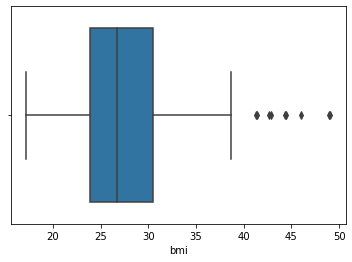

In [55]:
sns.boxplot(x="bmi", data=df);

In [56]:
stats.pearsonr(df.bmi, df.ap_hi)

(0.24647001775473615, 2.3530355316916008e-08)

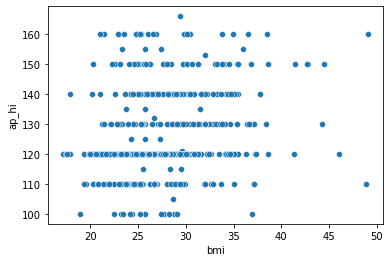

In [57]:
sns.scatterplot(x="bmi",
                y="ap_hi",
                data=df);

There is a significant positive and weak correlation between bmi and systolic blood pressure (r=0.2464, p<0.01)